In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
for i in df.columns:
    print(i, " - ", df[i].dtypes, ", unique value count- ", df[i].nunique(), ", unique values - ", ", ".join(map(str, df[i].unique())) if df[i].dtypes not in (int, float) else 'float/int', ", null values - ", df[i].isnull().sum())

Product  -  object , unique value count-  3 , unique values -  KP281, KP481, KP781 , null values -  0
Age  -  int64 , unique value count-  32 , unique values -  float/int , null values -  0
Gender  -  object , unique value count-  2 , unique values -  Male, Female , null values -  0
Education  -  int64 , unique value count-  8 , unique values -  float/int , null values -  0
MaritalStatus  -  object , unique value count-  2 , unique values -  Single, Partnered , null values -  0
Usage  -  int64 , unique value count-  6 , unique values -  float/int , null values -  0
Fitness  -  int64 , unique value count-  5 , unique values -  float/int , null values -  0
Income  -  int64 , unique value count-  62 , unique values -  float/int , null values -  0
Miles  -  int64 , unique value count-  37 , unique values -  float/int , null values -  0


In [4]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [5]:
df.describe().loc[["mean", "50%"], :]

,Age,Education,Usage,Fitness,Income,Miles
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000


In [6]:
num_cols = df.describe().columns

In [7]:
df.describe().loc["mean", i] < df.describe().loc["50%", i]

False



Age
mean    28.788889
50%     26.000000
Name: Age, dtype: float64
The column: Age has outliers towards the right


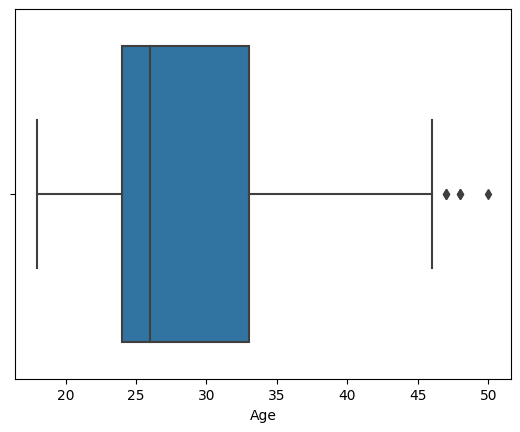



Education
mean    15.572222
50%     16.000000
Name: Education, dtype: float64
The column: Education has outliers towards the left


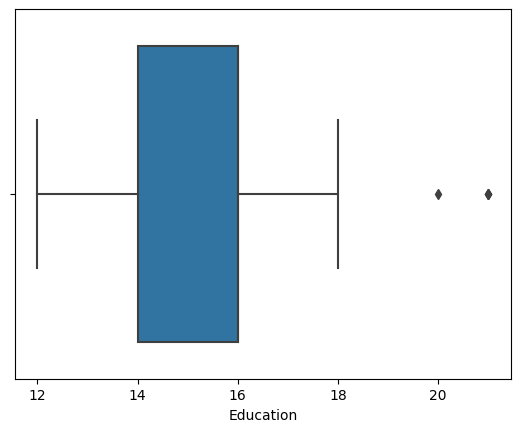



Usage
mean    3.455556
50%     3.000000
Name: Usage, dtype: float64
The column: Usage has outliers towards the right


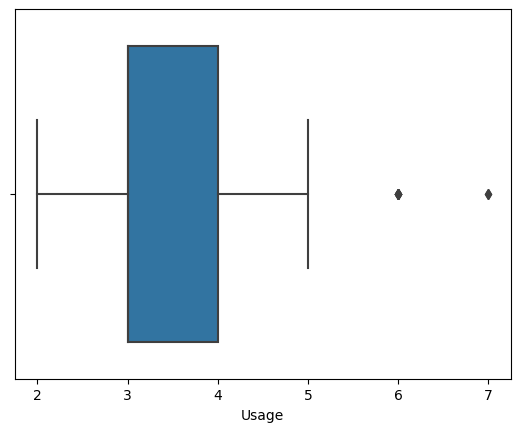



Fitness
mean    3.311111
50%     3.000000
Name: Fitness, dtype: float64
The column: Fitness has outliers towards the right


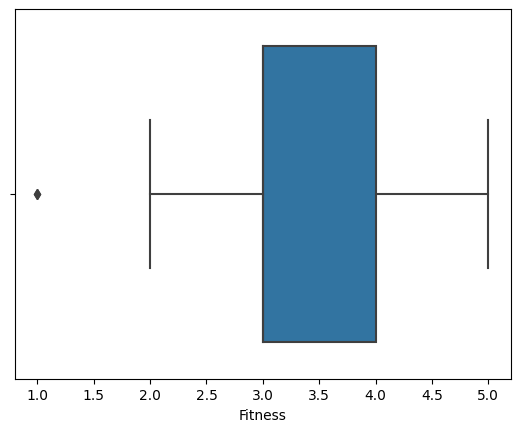



Income
mean    53719.577778
50%     50596.500000
Name: Income, dtype: float64
The column: Income has outliers towards the right


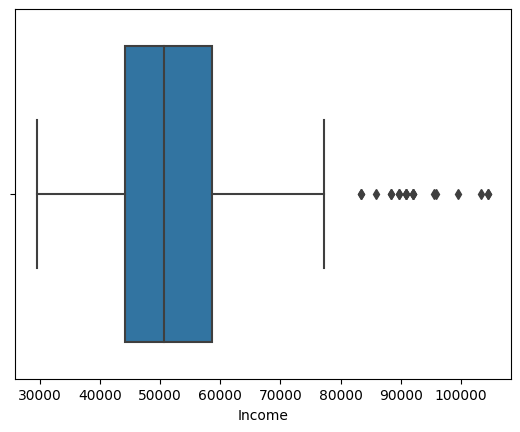



Miles
mean    103.194444
50%      94.000000
Name: Miles, dtype: float64
The column: Miles has outliers towards the right


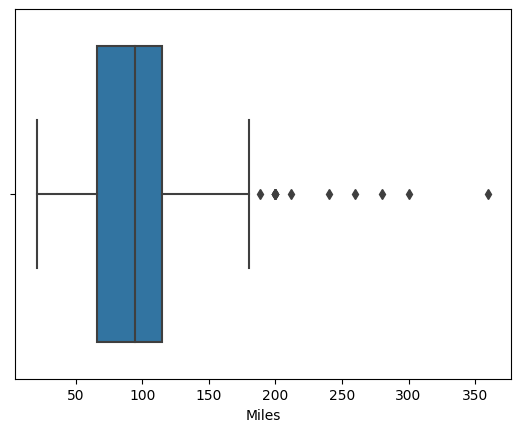

In [8]:
for i in num_cols:
    print("\n")
    print(i)
    print(df.describe().loc[["mean", "50%"], i])
    if df.describe().loc["mean", i] < df.describe().loc["50%", i]:
        print(f"The column: {i} has outliers towards the left")
    elif df.describe().loc["mean", i] > df.describe().loc["50%", i]:
        print(f"The column: {i} has outliers towards the right")
    else:
        print(f"The column: {i} doesn't have any outliers")
    # plt.figure(figsize=(6,10))
    # sns.displot(x=df[i], kind='kde')
    # plt.show()
    sns.boxplot(x=df[i])
    plt.show()
    # print("\n")

In [9]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [10]:
pd.cut(df['Age'], bins=3)

0      (17.968, 28.667]
1      (17.968, 28.667]
2      (17.968, 28.667]
3      (17.968, 28.667]
4      (17.968, 28.667]
             ...       
175      (39.333, 50.0]
176      (39.333, 50.0]
177      (39.333, 50.0]
178      (39.333, 50.0]
179      (39.333, 50.0]
Name: Age, Length: 180, dtype: category
Categories (3, interval[float64, right]): [(17.968, 28.667] < (28.667, 39.333] < (39.333, 50.0]]

In [11]:
df['Cohorts_by_Age'] = pd.qcut(df['Age'], q=3, labels=['Young', 'Mature', 'Elderly'])

## Impact of marital status, age have any effect on the product purchased

In [12]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

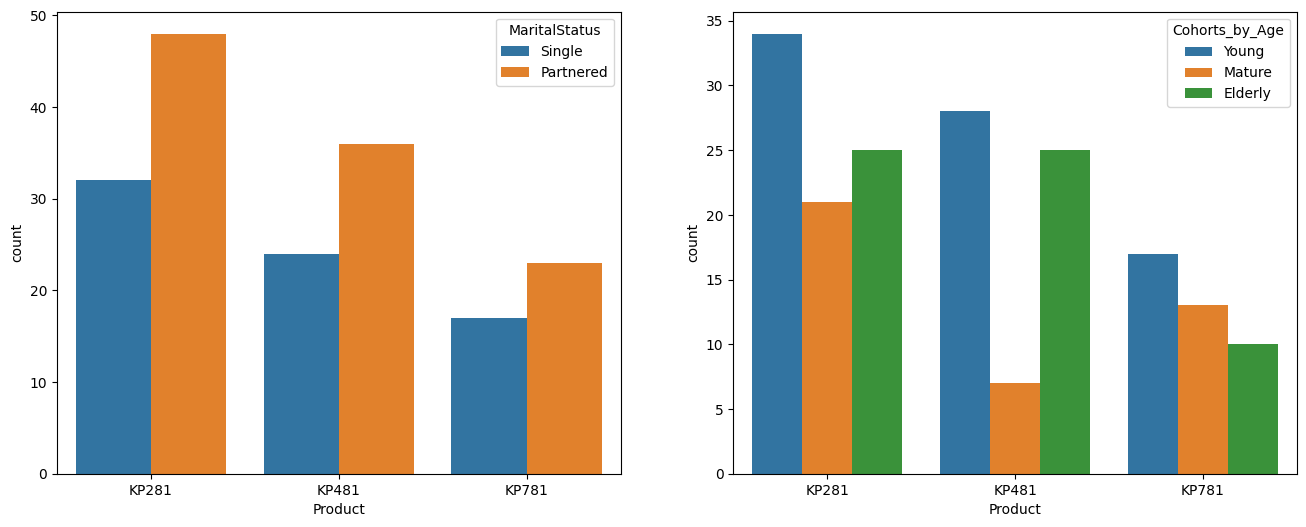

In [13]:
# Marital Status v/s Products Purchased
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=df['Product'], hue = df['MaritalStatus'])
# plt.show()

plt.subplot(1,2,2)
sns.countplot(x=df['Product'], hue = df['Cohorts_by_Age'])
plt.show()
 

In [14]:
pd.crosstab(index=df['Product'], columns =df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [15]:
pd.crosstab(index=df['Product'], columns =df['Cohorts_by_Age'])

Cohorts_by_Age,Young,Mature,Elderly
Product,,,
KP281,34,21,25
KP481,28,7,25
KP781,17,13,10


<Figure size 1600x600 with 0 Axes>

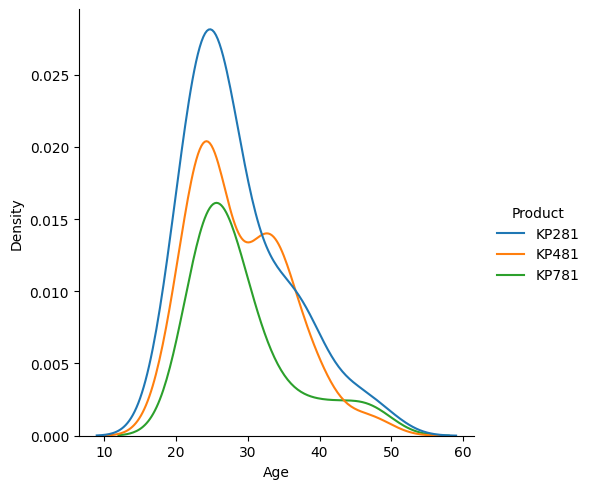

In [16]:
plt.figure(figsize=(16, 6))

sns.displot(x=df['Age'], hue = df['Product'], kind='kde')
plt.show()



<Figure size 1600x600 with 0 Axes>

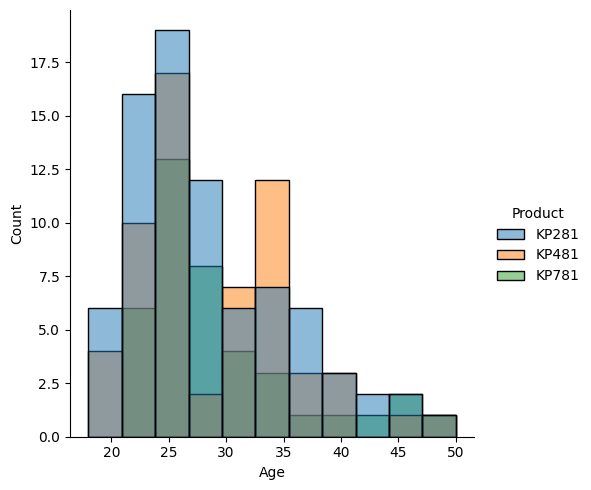

In [17]:
plt.figure(figsize=(16, 6))

sns.displot(x=df['Age'], hue = df['Product'])
plt.show()

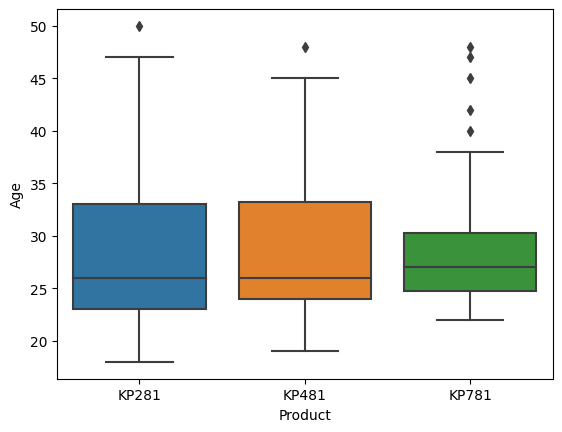

In [18]:
sns.boxplot(y=df['Age'], x = df['Product'])
plt.show()

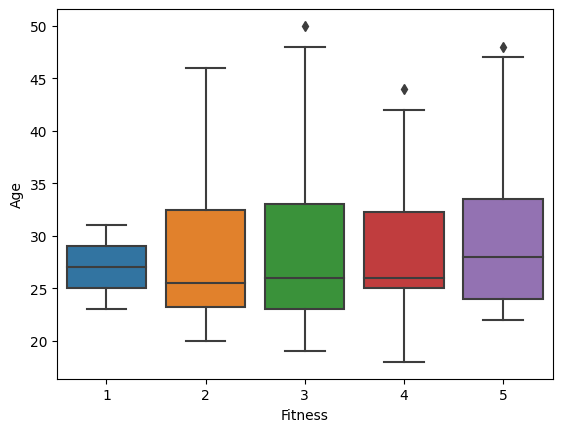

In [19]:
sns.boxplot(y=df['Age'], x = df['Fitness'])
plt.show()

In [20]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [21]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Cohorts_by_Age'],
      dtype='object')

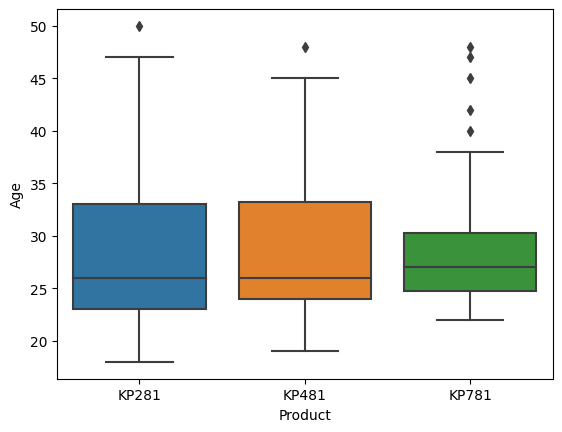

In [22]:
sns.boxplot(y=df['Age'], x = df['Product'])
plt.show()

#### Result: 
- The products are preferred in **Partnered couples**
- Age wise there doesn't seem to be much difference across Product. Since the distributions look quite similar but the **median of KP781** is little bit on the higher age group.
- It seems that the Young Cohort prefer **KP281** more than Mature and Elderly Audiences
- It seems that the Young & Elderly Cohorts prefer **KP481** more than Mature Audiences whereas sales of **KP781** is somewhat similar across cohorts


## What percent of customers have purchased various products?

In [23]:
def cat_pct(data=df, cat='MaritalStatus'):
    m_cust = pd.crosstab(index=data['Product'], columns=data[cat])
    stri = "---------------------------------------"
    print(stri)
    print(f"Original Aggregate for {cat}")
    print(stri)
    print("\n")
    print(stri)
    print(m_cust)
    print(stri)
    a = m_cust.sum(axis=1)
    for i in m_cust.columns:
        m_cust[i]=round(m_cust[i]*100/a, 2)
    return m_cust

In [24]:
cat_pct(data=df, cat='MaritalStatus')

# Partnered people are significantly buying the three products more than single people 

---------------------------------------
Original Aggregate for MaritalStatus
---------------------------------------


---------------------------------------
MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17
---------------------------------------


MaritalStatus,Partnered,Single
Product,,
KP281,60.0,40.0
KP481,60.0,40.0
KP781,57.5,42.5


In [25]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Cohorts_by_Age'],
      dtype='object')

In [26]:
cat_pct(data=df, cat='Gender')

# KP781 is significantly preferred among the males as compared to Females whereas other products have somewhat equal preference across genders.

---------------------------------------
Original Aggregate for Gender
---------------------------------------


---------------------------------------
Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33
---------------------------------------


Gender,Female,Male
Product,,
KP281,50.00,50.00
KP481,48.33,51.67
KP781,17.50,82.50


In [27]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Cohorts_by_Age'],
      dtype='object')

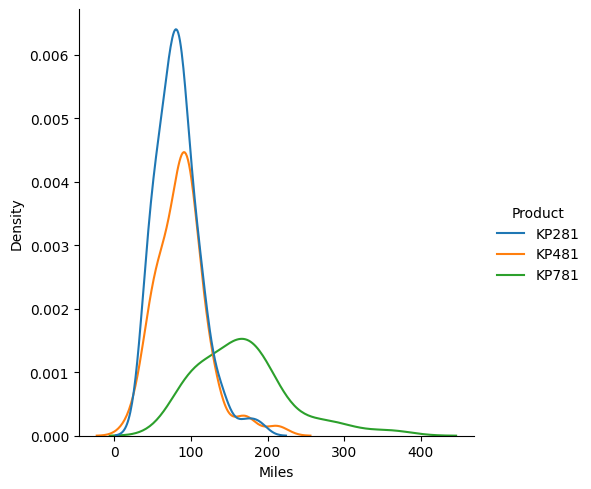

In [28]:
data = df.loc[:, :]

sns.displot(x=data['Miles'], hue=df['Product'], kind='kde')
plt.show()

# KP281, KP481 are similar kind of Products in terms of target based on miles set.
# KP781 has a higher Usage w.r.t KP281, KP481 in terms of target based on miles set.

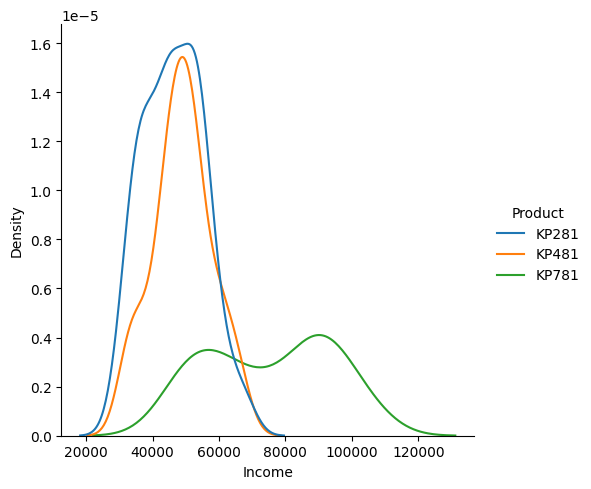

In [29]:
# df['Fitness']==3
data = df.loc[:, :]

sns.displot(x=data['Income'], hue = data['Product'], kind='kde')
plt.show()

# Higher Income as well as Lower income folks are buying KP781.
# KP281, KP481 are bought by Lower Income folks only. (less than 80000 income)

In [30]:
df['Income_Cohorts'] = pd.cut(df['Income'], bins= [df['Income'].min(), 80000, df['Income'].max()], labels=["Low Income", "High Income"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codesp

<Figure size 1000x800 with 0 Axes>

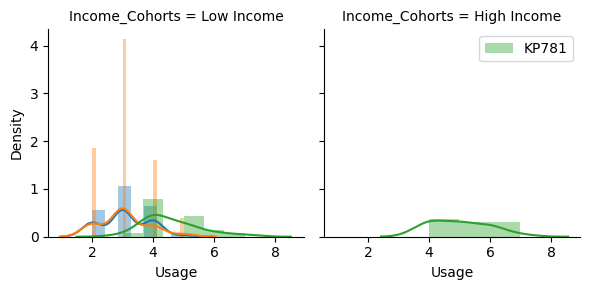

In [31]:
plt.figure(figsize=(10,8))
g = sns.FacetGrid(df, col="Income_Cohorts", hue='Product')
g.map(sns.distplot, "Usage")
plt.legend()
plt.show()

/tmp/ipykernel_8376/514897890.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


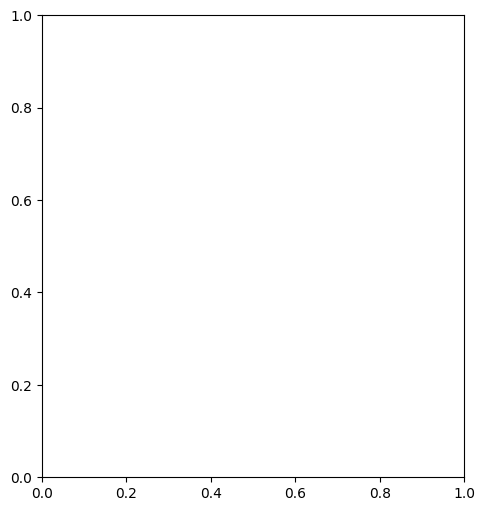

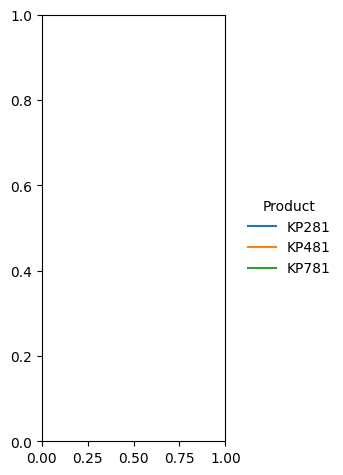

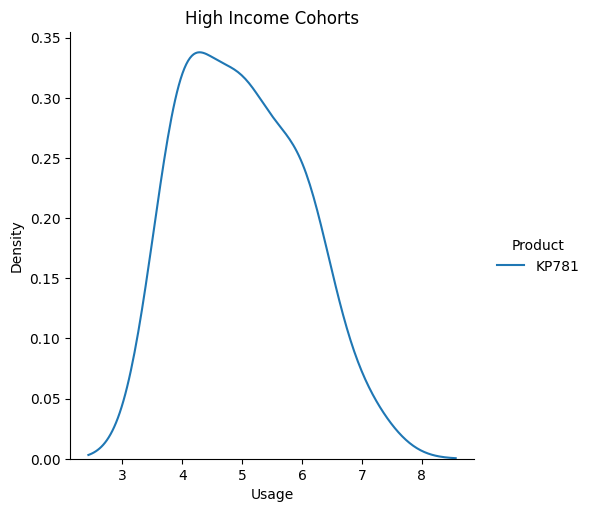

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
data = df.loc[df['Income_Cohorts']=='Low Income', :]
sns.displot(x=data['Usage'], hue = data['Product'], kind='kde')
plt.title("Low Income Cohorts")
# plt.show()

plt.subplot(1,2,2)
data = df.loc[df['Income_Cohorts']=='High Income', :]
sns.displot(x=data['Usage'], hue = data['Product'], kind='kde')
plt.title("High Income Cohorts")
plt.show()

In [33]:
cat_pct(data=df, cat='Cohorts_by_Age')

# KP481 is significantly preferred among the males as compared to Females whereas other products have somewhat equal preference across genders.

---------------------------------------
Original Aggregate for Cohorts_by_Age
---------------------------------------


---------------------------------------
Cohorts_by_Age  Young  Mature  Elderly
Product                               
KP281              34      21       25
KP481              28       7       25
KP781              17      13       10
---------------------------------------


Cohorts_by_Age,Young,Mature,Elderly
Product,,,
KP281,42.50,26.25,31.25
KP481,46.67,11.67,41.67
KP781,42.50,32.50,25.00


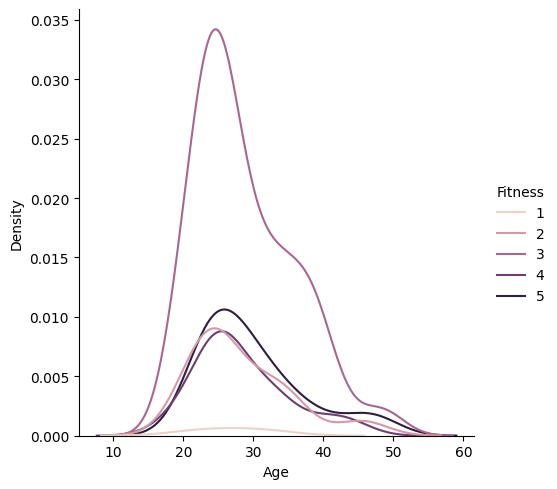

In [34]:
data = df.loc[:, :]

sns.displot(x=data['Age'], hue = data['Fitness'], kind='kde')
plt.show()

In [35]:

cat_pct(data=df, cat='Fitness')


# KP781 is significantly preferred among fittest individuals rating 5
# KP481 & KP281 is significantly not preferred among fittest (5) and unfit people (1). 

---------------------------------------
Original Aggregate for Fitness
---------------------------------------


---------------------------------------
Fitness  1   2   3  4   5
Product                  
KP281    1  14  54  9   2
KP481    1  12  39  8   0
KP781    0   0   4  7  29
---------------------------------------


Fitness,1,2,3,4,5
Product,,,,,
KP281,1.25,17.5,67.5,11.25,2.5
KP481,1.67,20.0,65.0,13.33,0.0
KP781,0.00,0.0,10.0,17.50,72.5


In [36]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Cohorts_by_Age', 'Income_Cohorts'],
      dtype='object')

In [37]:
cat_pct(data=df, cat='Income_Cohorts')

---------------------------------------
Original Aggregate for Income_Cohorts
---------------------------------------


---------------------------------------
Income_Cohorts  Low Income  High Income
Product                                
KP281                   79            0
KP481                   60            0
KP781                   21           19
---------------------------------------


Income_Cohorts,Low Income,High Income
Product,,
KP281,100.0,0.0
KP481,100.0,0.0
KP781,52.5,47.5


/tmp/ipykernel_8376/221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


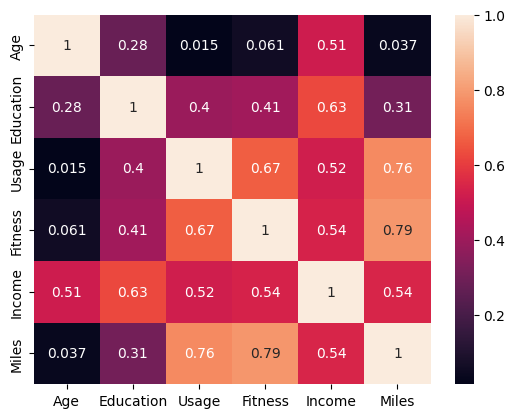

In [38]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [43]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Cohorts_by_Age', 'Income_Cohorts'],
      dtype='object')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

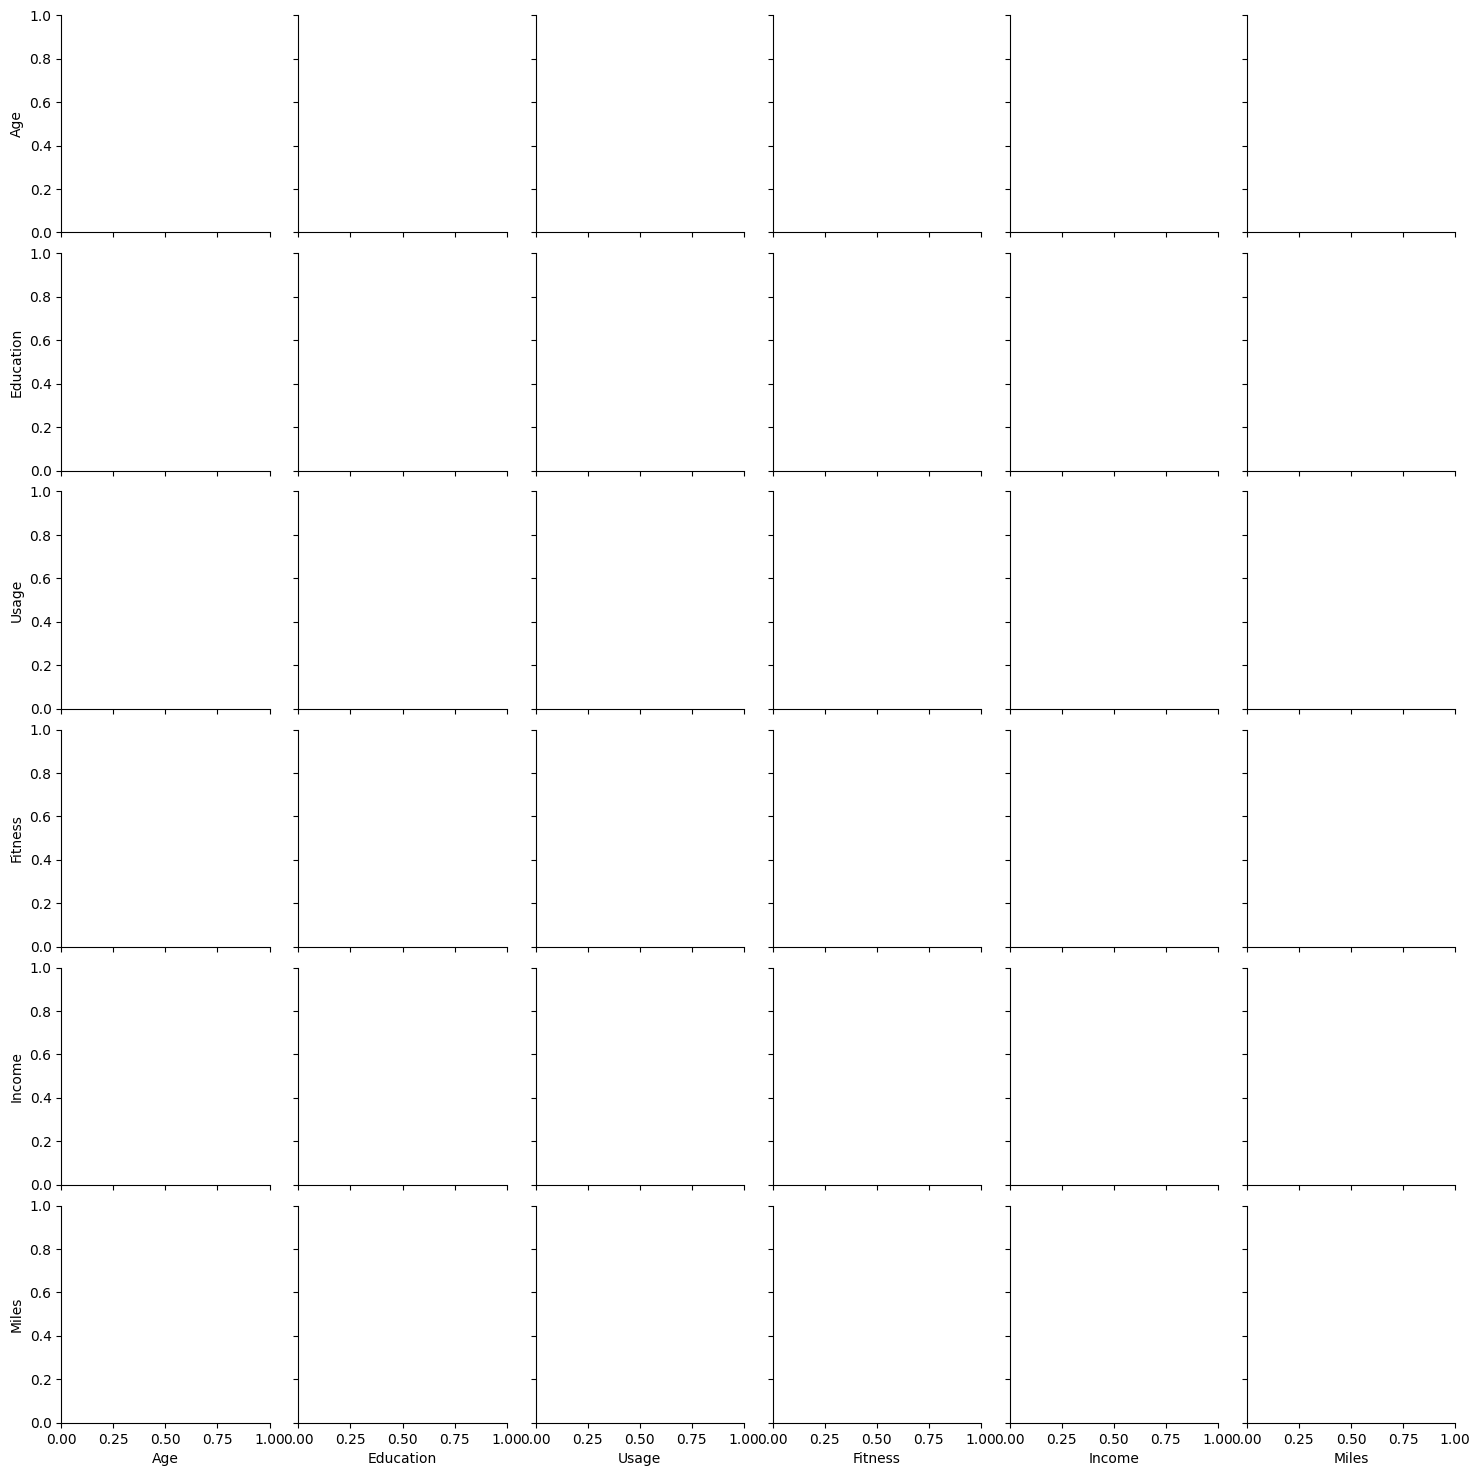

In [44]:
sns.pairplot(df, hue='Product')
# plt.show()